# Computational Thermofluid Dynamics - Chapter 2

Technical University of Munich, Professur für Thermofluiddynamik - Pr. Polifke

Created: 04/2024 | J. Yao, N. Garcia, G. Varillon

==============================================================================================

# Finite Differences
The 2D steady heat equation reads:
$$
\frac{\partial}{\partial x}(\lambda\frac{\partial T}{\partial x}) + \frac{\partial}{\partial y}(\lambda\frac{\partial T}{\partial y}) = 0
$$

In [5]:
import numpy as np
import pandas as pd

In [16]:
class SteadyHeat2D:
    def __init__(self, Lx, Ly, dimX, dimY):
        self.l = Lx #lunghezza rettangolo
        self.h = Ly
        self.dimX = dimX #quante divisioni
        self.dimY = dimY

        self.dx = Lx/dimX
        self.dy = Ly/dimY

        self.A = np.identity(self.dimX*self.dimY)
        self.set_inner()
        self.b = np.zeros([self.dimX*self.dimY])
        
    
    # build the linear system
    def set_inner(self):
        for i in range(self.dimX+1, (self.dimX*self.dimY)-self.dimX-1, self.dimX): # the start of each row of inner nodes 
            for j in range(self.dimX-2): # loops through all inner nodes in that row 
                k = i+j
                # builds the matrix like in scicomplab, so each row
                self.A[k][k] = -2 * (1/(self.dx*self.dx) + 1/(self.dy*self.dy)) # central node
                self.A[k][k-1] = 1/(self.dx*self.dx) # side nodes
                self.A[k][k+1] = 1/(self.dx*self.dx)
                self.A[k][k - self.dimX] = 1/(self.dy*self.dy) # upper lower nodes
                self.A[k][k + self.dimX] = 1/(self.dy*self.dy)

    # south
    def set_south(self, bc_type, T_d=0.0, q=0.0, alpha = 0.0, T_inf=0.0):
        if (bc_type=="d"):
            try: 
                self.b[-self.dimX:] = T_d
                for i in range(self.dimX):
                    ii = (self.dimX*self.dimY) - i - 1
                    self.A[ii][ii] = 1
            except:
                print("no T_d value for source boundary type")
        elif (bc_type=="n"):
            try:
                for i in range(self.dimX):
                    ii = (self.dimX*self.dimY)-i-1
                    self.b[ii] = q
                    self.A[ii][ii] = -4/(2*self.dimY)
                    self.A[ii][ii-self.dimX] = 3/(2*self.dimY)
                    self.A[ii][ii-(2*self.dimX)] = 1/(2*self.dimY)
            except:
                print("no q value for flux boundary type")
        elif (bc_type=="r"):
            try:
                for i in range(self.dimX):
                    ii = (self.dimX*self.dimY)-i-1
                    self.b[ii] = alpha * T_inf
                    self.A[ii][ii] = alpha + 3/(2*self.dimY)
                    self.A[ii][ii-self.dimX] = -4/(2*self.dimY)
                    self.A[ii][ii-(2*self.dimX)] = 1/(2*self.dimY)
            except:
                print("no alpha or T_inf value for conjugate boundary type")
        else:
            raise TypeError("Unknown boundary condition: {0:s}".format(bc_type))


    # north
    def set_north(self, bc_type, T_d=0.0, q=0.0, alpha = 0.0, T_inf=0.0):
        if (bc_type=="d"):
            try: 
                self.b[:self.dimX] = T_d
                for i in range(self.dimX):
                    ii = i
                    self.A[ii][ii] = 1
            except:
                print("no T_d value for source boundary type")
        elif (bc_type=="n"):
            try:
                for i in range(self.dimX):
                    ii = i
                    self.b[ii] = q
                    self.A[ii][ii] = -4/(2*self.dimY)
                    self.A[ii][ii+self.dimX] = 3/(2*self.dimY)
                    self.A[ii][ii+(2*self.dimX)] = 1/(2*self.dimY)
            except:
                print("no q value for flux boundary type")
        elif (bc_type=="r"):
            try:
                for i in range(self.dimX):
                    ii = i
                    self.b[ii] = alpha * T_inf
                    self.A[ii][ii] = alpha + 3/(2*self.dimY)
                    self.A[ii][ii+self.dimX] = -4/(2*self.dimY)
                    self.A[ii][ii+(2*self.dimX)] = 1/(2*self.dimY)
            except:
                print("no alpha or T_inf value for conjugate boundary type")
        else:
            raise TypeError("Unknown boundary condition: {0:s}".format(bc_type))


    # west
    def set_west(self, bc_type, T_d=0.0, q=0.0, alpha = 0.0, T_inf=0.0):
        if (bc_type=="d"):
            try: 
                for i in range(self.dimY):
                    ii = i * self.dimX
                    self.b[ii] = T_d
                    self.A[ii][ii] = 1
            except:
                print("no T_d value for source boundary type")
        elif (bc_type=="n"):
            try:
                for i in range(self.dimY):
                    ii = i * self.dimX
                    self.b[ii] = q
                    self.A[ii][ii] = -4/(2*self.dimX)
                    self.A[ii][ii+1] = 3/(2*self.dimX)
                    self.A[ii][ii+2] = 1/(2*self.dimX)
            except:
                print("no q value for flux boundary type")
        elif (bc_type=="r"):
            try:
                for i in range(self.dimY):
                    ii = i * self.dimX
                    self.b[ii] = alpha * T_inf
                    self.A[ii][ii] = alpha + 3/(2*self.dimY)
                    self.A[ii][ii+1] = -4/(2*self.dimY)
                    self.A[ii][ii+2] = 1/(2*self.dimY)
            except:
                print("no alpha or T_inf value for conjugate boundary type")
        else:
            raise TypeError("Unknown boundary condition: {0:s}".format(bc_type))


# east
    def set_east(self, bc_type, T_d=0.0, q=0.0, alpha = 0.0, T_inf=0.0):
        if (bc_type=="d"):
            try: 
                for i in range(self.dimY):
                    ii = i * self.dimX + self.dimX -1
                    self.b[ii] = T_d
                    self.A[ii][ii] = 1
            except:
                print("no T_d value for source boundary type")
        elif (bc_type=="n"):
            try:
                for i in range(self.dimY):
                    ii = i * self.dimX + self.dimX -1
                    self.b[ii] = q
                    self.A[ii][ii] = -4/(2*self.dimX)
                    self.A[ii][ii-1] = 3/(2*self.dimX)
                    self.A[ii][ii-2] = 1/(2*self.dimX)
            except:
                print("no q value for flux boundary type")
        elif (bc_type=="r"):
            try:
                for i in range(self.dimY):
                    ii = i * self.dimX + self.dimX -1
                    self.b[ii] = alpha * T_inf
                    self.A[ii][ii] = alpha + 3/(2*self.dimY)
                    self.A[ii][ii-1] = -4/(2*self.dimY)
                    self.A[ii][ii-2] = 1/(2*self.dimY)
            except:
                print("no alpha or T_inf value for conjugate boundary type")
        else:
            raise TypeError("Unknown boundary condition: {0:s}".format(bc_type))
        
    def print_A(self):
        df_A = pd.DataFrame(self.A)
        print(df_A)
       
       

    # solve the linear system
    def solve(self):
        return np.linalg.solve(self.A, self.b)


In [17]:
# Test
Lx = 1
Ly = 1
dimX = 4
dimY = 4
bc_type = "n"

heat = SteadyHeat2D(Lx, Ly, dimX, dimY)

heat.set_south("d", T_d=5)
heat.set_west("d", T_d=20)
heat.set_north("d", T_d=20)
heat.set_east("d", T_d=5)

# heat.set_north("d", T_d=0)A
# heat.set_south("d", T_d=0)
# heat.set_east("d", T_d=0)
# heat.set_west("d", T_d=0)

heat.print_A()

T = heat.solve()
T.reshape((dimX, dimY))

     0     1     2    3     4     5     6     7     8     9     10    11   12  \
0   1.0   0.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0   
1   0.0   1.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0   
2   0.0   0.0   1.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0   
3   0.0   0.0   0.0  1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0   
4   0.0   0.0   0.0  0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0   
5   0.0  16.0   0.0  0.0  16.0 -64.0  16.0   0.0   0.0  16.0   0.0   0.0  0.0   
6   0.0   0.0  16.0  0.0   0.0  16.0 -64.0  16.0   0.0   0.0  16.0   0.0  0.0   
7   0.0   0.0   0.0  0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0  0.0   
8   0.0   0.0   0.0  0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0  0.0   
9   0.0   0.0   0.0  0.0   0.0  16.0   0.0   0.0  16.0 -64.0  16.0   0.0  0.0   
10  0.0   0.0   0.0  0.0   0.0   0.0  16.0   0.0   0.0  16.0 -64.0  16.0  0.0   
11  0.0   0.0   0.0  0.0   0

array([[20.  , 20.  , 20.  ,  5.  ],
       [20.  , 16.25, 12.5 ,  5.  ],
       [20.  , 12.5 ,  8.75,  5.  ],
       [20.  ,  5.  ,  5.  ,  5.  ]])

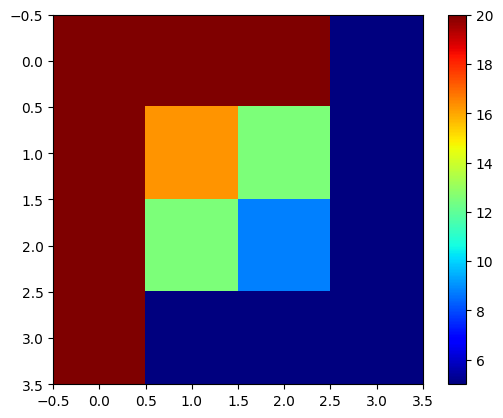

In [18]:
import matplotlib.pyplot as plt

matrix = T.reshape((dimX, dimY))
plt.imshow(matrix, cmap='jet')
plt.colorbar()
plt.show()

In [5]:
from scipy.sparse import dia_matrix, dia_array
from scipy.sparse.linalg import spsolve

data = np.ones([2, 5])
# ldiag = np.ones([5])
offsets = np.array([0, -1])

A = dia_matrix((data, offsets), shape=(5, 5))
b = np.ones(5)
x = spsolve(A, b)

/tmp/ipykernel_2447/4162061270.py:10: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  x = spsolve(A, b)


In [6]:
x

array([1., 0., 1., 0., 1.])